# Titanic: Machine Learning from Disaster

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import svm

In [51]:
train_data = pd.read_csv("Datasets/train.csv")
test_data = pd.read_csv("Datasets/test.csv")

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing Data 

In [53]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = (train_data.isnull().sum()/train_data.shape[0])*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [67]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = (test_data.isnull().sum()/test_data.shape[0])*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


Relation between embarkment and survival

In [54]:
train_data['Embarked'].value_counts()/len(train_data)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

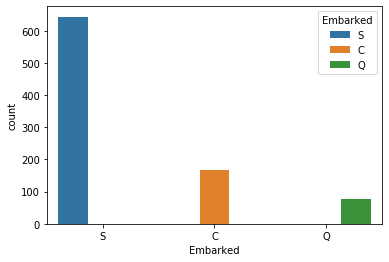

In [56]:
sns.countplot( x='Embarked', data=train_data, hue="Embarked");

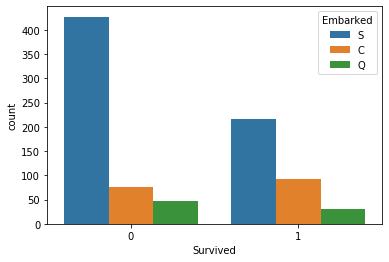

In [57]:
sns.countplot( x="Survived", data=train_data, hue="Embarked");

In [58]:
train_data.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


Relation between Survival and Gender

In [59]:
train_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Handling Missing Data 

In [100]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [115]:
features_to_drop_train = ["Name","Cabin","PassengerId","Survived","Ticket"]
features_to_drop_test = ["Name","Cabin","PassengerId","Ticket"]
train_data = train_data.dropna(subset=['Embarked'],axis = 0)
X_train = train_data.copy()
X_test = test_data.copy()

y_train = X_train["Survived"]
X_train = X_train.drop(features_to_drop_train,axis = 1)
X_test = X_test.drop(features_to_drop_test,axis = 1)

print(X_train.head())
print(y_train.head())
print(X_test.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [116]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)



Categorical variables:
['Sex', 'Embarked']


In [118]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])
    print(label_X_train.head())


   Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0       3    1  22.0      1      0   7.2500        S
1       1    0  38.0      1      0  71.2833        C
2       3    0  26.0      0      0   7.9250        S
3       1    0  35.0      1      0  53.1000        S
4       3    1  35.0      0      0   8.0500        S
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


In [119]:
imputed_X_train = pd.DataFrame(imputer.fit_transform(label_X_train))
imputed_X_test = pd.DataFrame(imputer.transform(label_X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = label_X_train.columns
imputed_X_test.columns = label_X_test.columns


In [120]:
print(imputed_X_train.head())
print(imputed_X_test.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0     3.0  1.0  22.0    1.0    0.0   7.2500       2.0
1     1.0  0.0  38.0    1.0    0.0  71.2833       0.0
2     3.0  0.0  26.0    0.0    0.0   7.9250       2.0
3     1.0  0.0  35.0    1.0    0.0  53.1000       2.0
4     3.0  1.0  35.0    0.0    0.0   8.0500       2.0
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0     3.0  1.0  34.5    0.0    0.0   7.8292       1.0
1     3.0  0.0  47.0    1.0    0.0   7.0000       2.0
2     2.0  1.0  62.0    0.0    0.0   9.6875       1.0
3     3.0  1.0  27.0    0.0    0.0   8.6625       2.0
4     3.0  0.0  22.0    1.0    1.0  12.2875       2.0


In [121]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(imputed_X_train)
rescaledX_test = scaler.fit_transform(imputed_X_test)

In [122]:
print(rescaledX_train)
print(rescaledX_test)

[[1.         1.         0.27117366 ... 0.         0.01415106 1.        ]
 [0.         0.         0.4722292  ... 0.         0.13913574 0.        ]
 [1.         0.         0.32143755 ... 0.         0.01546857 1.        ]
 ...
 [1.         0.         0.36720398 ... 0.33333333 0.04577135 1.        ]
 [0.         1.         0.32143755 ... 0.         0.0585561  0.        ]
 [1.         1.         0.39683338 ... 0.         0.01512699 0.5       ]]
[[1.         1.         0.4527232  ... 0.         0.01528158 0.5       ]
 [1.         0.         0.61756561 ... 0.         0.01366309 1.        ]
 [0.5        1.         0.8153765  ... 0.         0.01890874 0.5       ]
 ...
 [1.         1.         0.50547277 ... 0.         0.01415106 1.        ]
 [1.         1.         0.38866006 ... 0.         0.01571255 1.        ]
 [1.         1.         0.38866006 ... 0.11111111 0.0436405  0.        ]]


In [123]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [125]:
predictions = logreg.predict(rescaledX_test)
predictions = 1 * predictions
print(predictions)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved")

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Your submission was successfully saved


In [126]:
pred = logreg.predict(rescaledX_train)
print(sum(pred==y_train)/len(y_train))

0.8008998875140607


In [130]:
clf = svm.SVC(kernel='rbf',C = 5) 
# fitting x samples and y classes 
clf.fit(rescaledX_train, y_train)

SVC(C=5)

In [131]:
predictions = clf.predict(rescaledX_test)
predictions = 1 * predictions
#print(predictions)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission1.csv', index=False)
print("Your submission was successfully saved")

Your submission was successfully saved


In [132]:
pred = clf.predict(rescaledX_train)
print(sum(pred==y_train)/len(y_train))

0.8267716535433071


In [133]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(rescaledX_train, y_train)

GradientBoostingClassifier(random_state=0)

In [134]:
predictions = clf.predict(rescaledX_test)
predictions = 1 * predictions
#print(predictions)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved")

Your submission was successfully saved


In [135]:
pred = clf.predict(rescaledX_train)
print(sum(pred==y_train)/len(y_train))

0.890888638920135
